In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

class Problem():
    def __init__(self, data):
        self.problem = data['problem']
        try: self.level = re.search(r'\d', data['level'])[0]
        except: self.level = None
        self.type =  data['type']
        self.solution = data['solution']
        self.problem_numbers = self.count_numbers(self.problem)
        self.solution_numbers = self.count_numbers(self.solution)

    def count_numbers(self,s):
        return len(re.findall(r'\d+', s))




In [10]:


problems = []

for root, dirs, files in os.walk("train"):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith(".json"):
            with open(file_path, "r") as f:
                problems.append(Problem(json.load(f)))

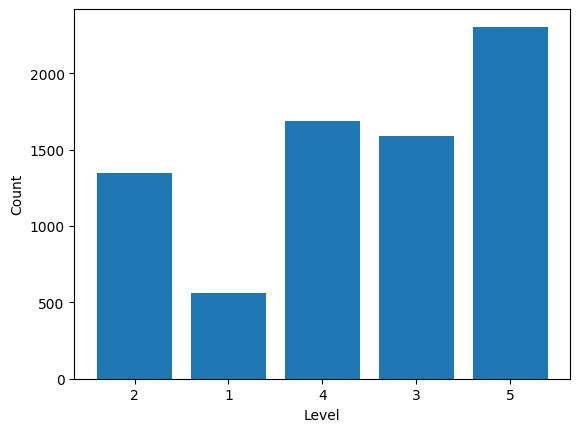

In [11]:
levels = [problem.level for problem in problems]
levels = [level for level in levels if level is not None]

level_counts = {level: levels.count(level) for level in set(levels)}

plt.bar(level_counts.keys(), level_counts.values())

plt.xlabel('Level')
plt.ylabel('Count')

plt.show()


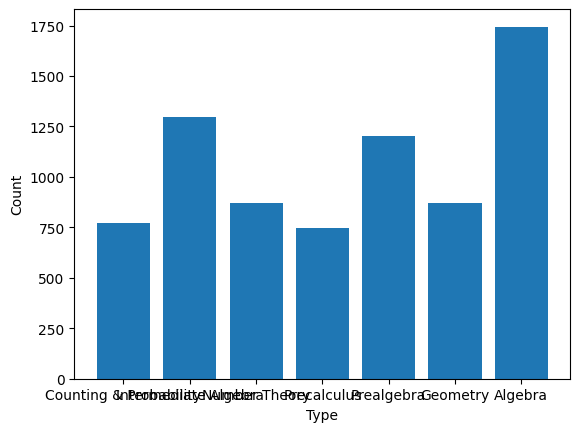

In [12]:
types = [problem.type for problem in problems]

type_counts = {type: types.count(type) for type in types}

plt.bar(type_counts.keys(), type_counts.values())

plt.xlabel('Type')
plt.ylabel('Count')

plt.show()


(array([4192., 2018.,  478.,  173.,  118.,   83.,   72.,   66.,   48.,
          31.,   40.,   27.,   26.,   11.,   14.,   19.,    8.,    8.,
          12.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <BarContainer object of 19 artists>)

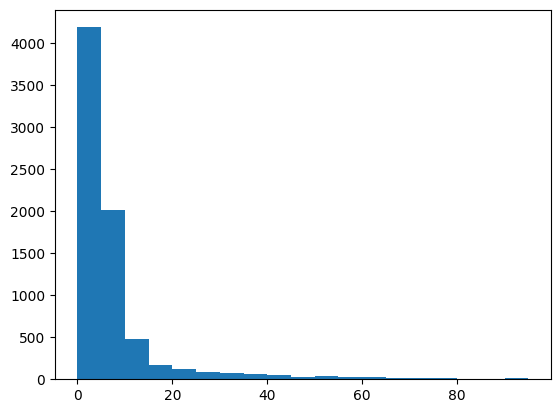

In [13]:
numbers = [problem.problem_numbers for problem in problems]

plt.hist(numbers, bins=range(0, 100, 5))

(array([ 218., 1000., 1160., 1025.,  833.,  614.,  447.,  360.,  291.,
         276.,  187.,  175.,  131.,  107.,   87.,   74.,   77.,   60.,
          67.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <BarContainer object of 19 artists>)

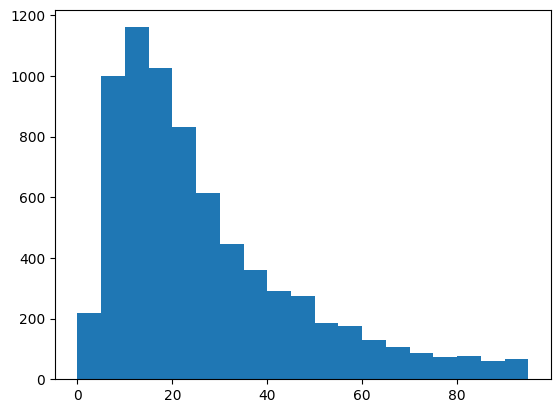

In [14]:
numbers = [problem.solution_numbers for problem in problems]

plt.hist(numbers, bins=range(0, 100, 5))

In [15]:
test = problems[0]
print(test.problem)
print(test.problem_numbers)


A board game spinner is divided into three parts labeled $A$, $B$  and $C$. The probability of the spinner landing on $A$ is $\frac{1}{3}$ and the probability of the spinner landing on $B$ is $\frac{5}{12}$.  What is the probability of the spinner landing on $C$? Express your answer as a common fraction.
4


[]

<Figure size 2000x600 with 0 Axes>

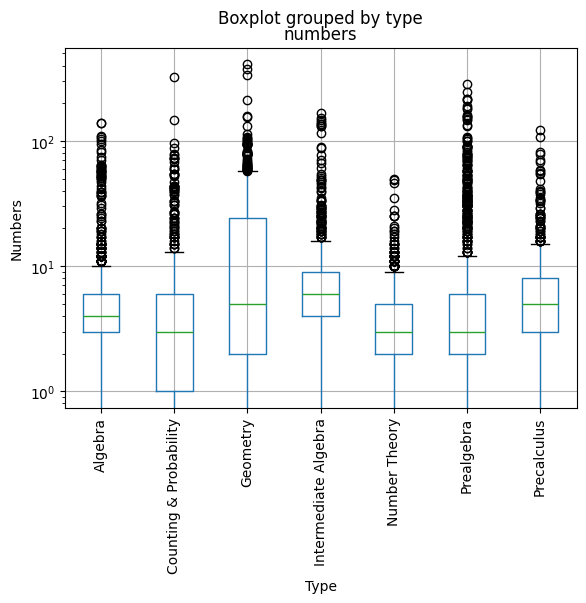

In [21]:

types = [problem.type for problem in problems]
numbers = [problem.problem_numbers for problem in problems]
df = pd.DataFrame({'type': types, 'numbers': numbers})

plt.figure(figsize=(20, 6))

# Create the boxplot
boxplot = df.boxplot(by='type')

plt.xticks(rotation=90)
# Add labels and title
plt.xlabel('Type')
plt.ylabel('Numbers')

plt.yscale('log')
plt.plot()

<Axes: title={'center': 'numbers'}, xlabel='[level]'>

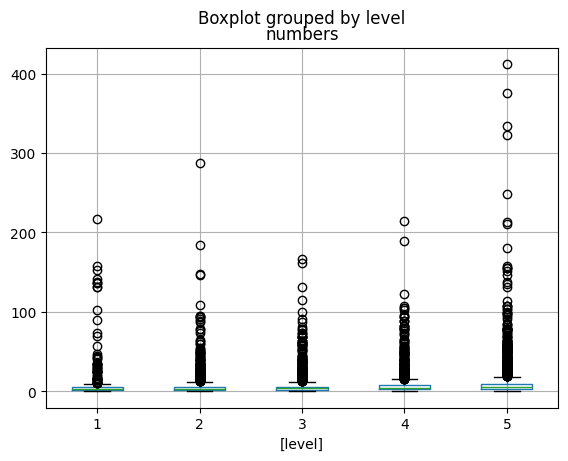

In [17]:
levels = [problem.level for problem in problems]
numbers = [problem.problem_numbers for problem in problems]
df = pd.DataFrame({'level': levels, 'numbers': numbers})

df.boxplot(by='level')